In [1]:
# import the three modules
import bratly as bt
import bratly_eval as bteval
import bratly_io_fs as btio

## Build annotations programmatically - first entities in a toy example
To make your annotation, you have to
  1. Identify indices of interest of your annotation (start, end).
  2. Instantiate a Fragment - which encodes the indices.
  3. Instantiate an EntityAnnotation - which finally encodes the entity.

In [2]:
my_string = "Let's work on annotated files in a Bratly manner. This is more straightforward than ever !"
entity_to_annotate = "Bratly"

index_start = my_string.find(entity_to_annotate)
index_end = index_start + len(entity_to_annotate)
index_start, index_end

(35, 41)

In [3]:
my_fragment = bt.Fragment(start=index_start, end=index_end)
my_entity_1 = bt.EntityAnnotation(id="1", label="PythonPackage", fragments=[my_fragment], content=my_string[index_start:index_end])
my_entity_1

T1	PythonPackage 35 41	Bratly

NOTE: You can have multiple fragments in a single EntityAnnotation - allowing discontinuous annotations. For instance:

In [4]:
entities_to_annotate = ["more", "than"]

my_fragments = []
for e in entities_to_annotate:
    ind_start = my_string.find(e)
    ind_end = ind_start + len(e)
    fragment = bt.Fragment(start=ind_start, end=ind_end)
    my_fragments.append(fragment)

multi_frag_content = " ".join(entities_to_annotate)
my_entity_2 = bt.EntityAnnotation(id="2", label="Comparative", fragments=my_fragments, content=multi_frag_content)
my_entity_2

T2	Comparative 58 62;79 83	more than

NOTE2: Bratly supports all 7 types of annotations used by BRAT. They are:
- EntityAnnotation
- RelationAnnotation
- AttributeAnnotation
- EquivalenceAnnotation
- NormalizationAnnotation
- EventAnnotation
- NoteAnnotation

## Save the annotations and visualize it on BRAT
To save your annotations, you have to
  1. Instantiate an AnnotationCollection - which encodes the content of a .ann file (BRAT standoff format).
  2. Use bratly-io-fs (manage input-output functions) to save the AnnotationCollection as a file.
  3. Save the txt file as well - and run BRAT to visualize the annotations.

In [5]:
my_annotation_collection = bt.AnnotationCollection(annotations=[my_entity_1, my_entity_2])
my_annotation_collection

AnnotationCollection(version='0.0.1', comment='Empty comment', annotations=[T1	PythonPackage 35 41	Bratly, T2	Comparative 58 62;79 83	more than])

In [6]:
# Save annotations
path_data = "/workspaces/project/data/demo/"
btio.write_ann_file(annotations=my_annotation_collection, path=path_data+"toy_example.ann")

In [7]:
# Also save the text
with open(path_data+"toy_example.txt", "w") as file:
    file.write(my_string)

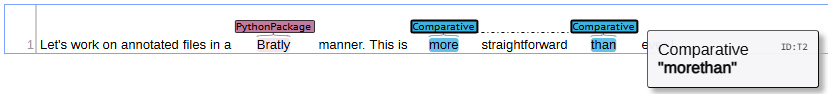

## Read Annotations From Disk
You can either:
1. Read the ann file only - getting only the AnnotationCollection, hence without the text reference
2. Or read both the ann and txt files - through a Document instance

In [8]:
# Read only the annotations...
my_annotations = btio.read_and_load_ann_file(path_data+"toy_example.ann")
my_annotations

AnnotationCollection(version='0.0.1', comment='Empty comment', annotations=[T1	PythonPackage 35 41	Bratly, T2	Comparative 58 62;79 83	more than])

In [9]:
# ... or read both
my_annotated_document = btio.read_and_load_txt_file(path_data+"toy_example.txt")
# the type is Document
assert(isinstance(my_annotated_document, bt.Document))
# It includes a list of AnnotationCollection objects in case a text has multiple annotations (e.g. parallel annotation, etc)
print(f"==> My annotations are included in: {my_annotated_document.annotation_collections}")
# It does not directly store the text content (for memory flexibility), but the path being stored, you can access to the text this way
print(f"==> My text is available in: {my_annotated_document.get_txt_content()}")

Attempt to find ann file through the path:  /workspaces/project/data/demo/toy_example.ann
==> My annotations are included in: [AnnotationCollection(version='0.0.1', comment='Empty comment', annotations=[T1	PythonPackage 35 41	Bratly, T2	Comparative 58 62;79 83	more than])]
==> My text is available in: Let's work on annotated files in a Bratly manner. This is more straightforward than ever !


## Manage annotated dataset
To work with datasets annotated with BRAT (multiple txt-ann pairs), the class DocumentCollection handles that.
You can load datasets as a DocumentCollection using bratly-io-fs module.

In [10]:
# Reading the MEDINA, an annotated dataset (available in https://github.com/grouin/medina)
my_dataset = btio.read_document_collection_from_folder(path_data+"eval/test3/medina/")
assert isinstance(my_dataset, bt.DocumentCollection)
print(f"This dataset has {len(my_dataset)} annotated documents.")

This dataset has 258 annotated documents.


In [11]:
# The type is DocumentCollection
assert(isinstance(my_dataset, bt.DocumentCollection))

# What kind of annotations do we have - and how many
annot_stats = my_dataset.stats_annotation_types()
print("Annotation types statistics")
annot_stats

Annotation types statistics


{bratly.annotation_types.EntityAnnotation: 4078,
 bratly.annotation_types.RelationAnnotation: 0,
 bratly.annotation_types.EquivalenceAnnotation: 0,
 bratly.annotation_types.EventAnnotation: 0,
 bratly.annotation_types.AttributeAnnotation: 0,
 bratly.annotation_types.NormalizationAnnotation: 0,
 bratly.annotation_types.NoteAnnotation: 0}

In [12]:
assert(isinstance(my_dataset, bt.DocumentCollection))
# What kind of entities are inside my dataset
entity_stats = my_dataset.stats_labels_given_annot_type(descendant_type=bt.EntityAnnotation)
print("Entity Annotation labels statistics")
entity_stats

Entity Annotation labels statistics


{'Date': 992,
 'ID': 305,
 'Organisation': 616,
 'Lieu': 961,
 'Divers': 363,
 'Personne': 841}

In [13]:
assert(isinstance(my_dataset, bt.DocumentCollection))
# How are dates formatted ?
date_stats = my_dataset.stats_entity_contents_given_label(label="Date")
date_stats

{'26 novembre 2019': 5,
 '2020': 30,
 '1er avril 2020': 1,
 '2 juin 2020': 1,
 '6 janvier 2020': 2,
 '31 janvier 2020': 2,
 '7 février 2020': 1,
 '7 févier 2020': 1,
 '2 février 2018': 4,
 '17 mars 1975': 1,
 '2 janvier 2018': 3,
 '19 décembre 2019': 8,
 '28 février 2001': 2,
 '26 juillet 1994': 1,
 '13 juillet 1993': 1,
 '26 février 2019': 2,
 '11 février 1976': 1,
 '19 mars 2018': 36,
 '2019': 14,
 '9 décembre 2019': 3,
 '22 octobre 2019': 9,
 '5 novembre 2019': 5,
 '17 décembre 2019': 8,
 '5 décembre 2019': 7,
 '20 janvier 2020': 2,
 '4 mai 2020': 1,
 '22 décembre 2017': 1,
 '10 avril 2020': 1,
 '10 janvier 2017': 4,
 '24 novembre 2016': 8,
 '20 février 2019': 2,
 '1er décembre 1980': 1,
 '1er mars 2019': 3,
 '29 juin 2001': 1,
 '28 octobre 2019': 10,
 '1er août 1986': 1,
 '1er novembre 2019': 7,
 '24 octobre 2019': 7,
 '18 septembre 2000': 1,
 '27 juin 2011': 2,
 '27 juin 2019': 1,
 '1er juillet 2019': 1,
 '23 août 2019': 1,
 '4 octobre 2019': 2,
 '9 juillet 2019': 8,
 '7 février 1

## Entity-Level Evaluation using MUC-5


In [14]:
# Get the path of both datasets
path_data = "/workspaces/project/data/demo/"
path_gold_standard = path_data+"eval/test3/medina/"
path_parallel_dataset = path_data+"eval/test3/tmp/"
path_output = path_data+"eval_results/"

res = bteval.compare_folders(parallel_folder=path_parallel_dataset, gold_folder=path_gold_standard, eval_folder=path_output)

writing muc table/workspaces/project/data/demo/eval_results/_muc_table.txt
